## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

## Reading the data

In [2]:
insurance_cost=pd.read_csv('/kaggle/input/insurance/insurance.csv')

## Performing EDA

In [3]:
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_cost.shape

(1338, 7)

In [5]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_cost.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_cost.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
insurance_cost['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
insurance_cost.corr(numeric_only=True)['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

### Age is partially normally distributed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

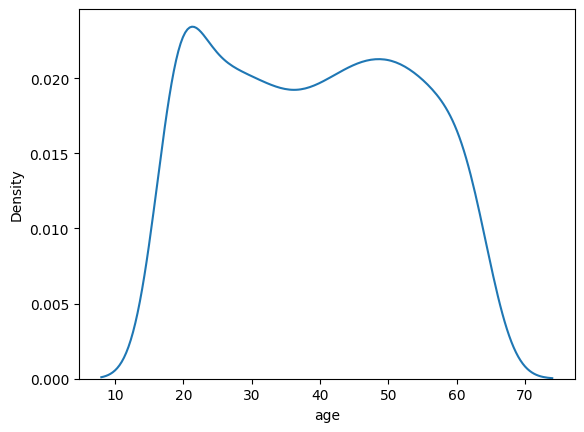

In [10]:
sns.kdeplot(insurance_cost['age'])

<Axes: xlabel='sex', ylabel='count'>

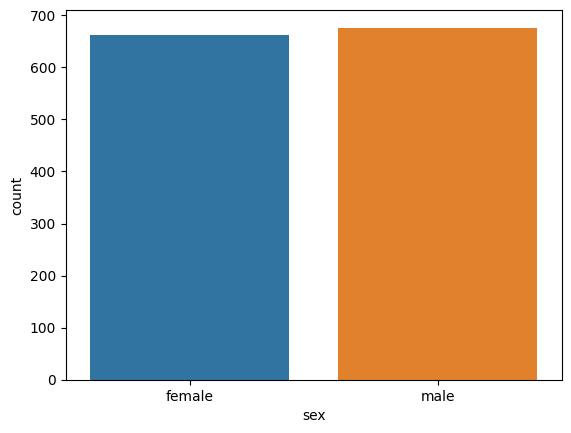

In [11]:
sns.countplot(x='sex', data=insurance_cost)

### BMI is completely normally distributed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Density'>

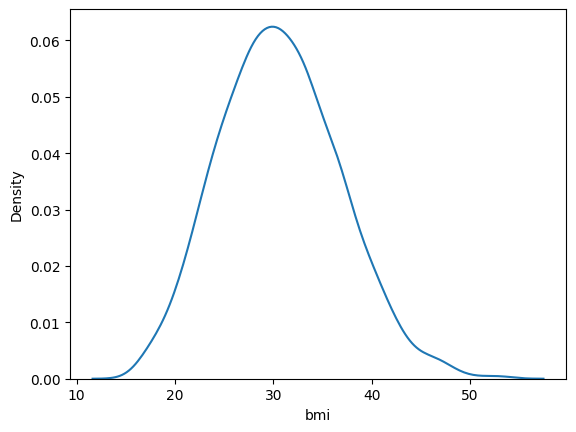

In [12]:
sns.kdeplot(insurance_cost['bmi'])

<Axes: xlabel='children', ylabel='count'>

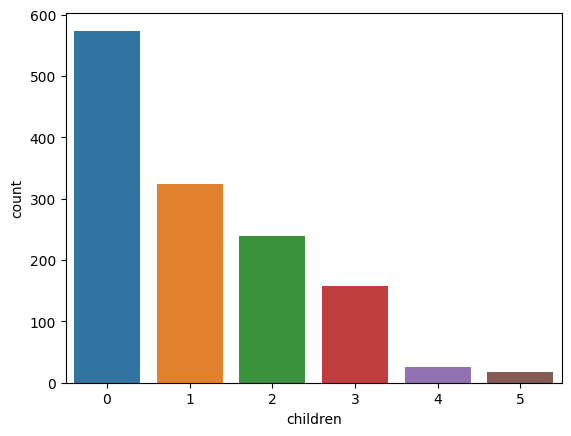

In [13]:
sns.countplot(x='children', data=insurance_cost)

<Axes: xlabel='smoker', ylabel='count'>

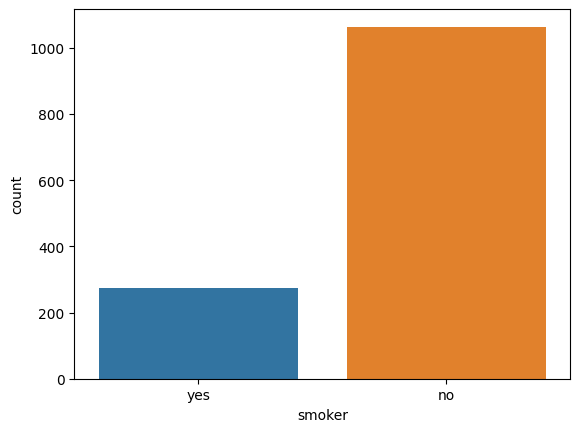

In [14]:
sns.countplot(x='smoker',data=insurance_cost)

<Axes: xlabel='region', ylabel='count'>

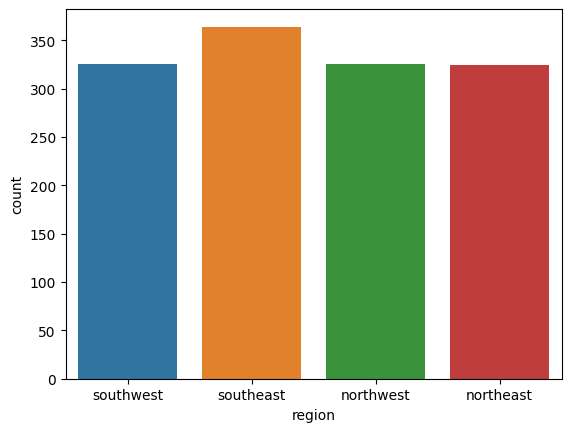

In [15]:
sns.countplot(x='region', data=insurance_cost)

/tmp/ipykernel_13/3061841441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_cost['charges'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Density'>

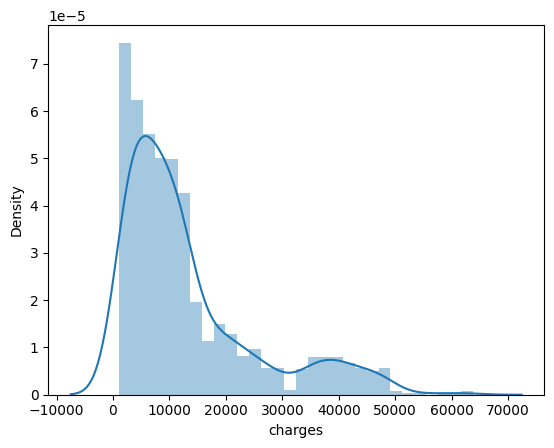

In [16]:
sns.distplot(insurance_cost['charges'])

## Splitting the Data

In [17]:
X=insurance_cost.drop(columns=['charges'])
y=insurance_cost['charges']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=2)

## Encoding Categorical Columns
### we have 3 categorical columns sex, smoker and region so i encoded them using OHE we can also use pd.get_dummies().

In [19]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(X_train[['sex','smoker','region']])
encoded_columns = ohe.get_feature_names_out(['sex', 'smoker', 'region'])
X_train_encoded=pd.DataFrame(ohe.transform(X_train[['sex','smoker','region']]), columns=encoded_columns, index=X_train.index)
X_test_encoded=pd.DataFrame(ohe.transform(X_test[['sex','smoker','region']]), columns=encoded_columns, index=X_test.index)
X_train_final=pd.concat([X_train.drop(columns=['smoker','sex','region']), X_train_encoded], axis=1)
X_test_final=pd.concat([X_test.drop(columns=['smoker','sex','region']), X_test_encoded], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
882,21,22.135,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
505,37,30.875,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
798,58,33.100,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
792,22,23.180,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
201,48,32.230,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
X_train_final.isna().sum()

age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

## Scaling the Data
### as our data is normally distributed I first scaled with Standardscaler

In [22]:
st=StandardScaler()
X_train_scaled=st.fit_transform(X_train_final)
X_test_scaled=st.transform(X_test_final)

In [23]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred=lr.predict(X_test_scaled)


## Accuracy on testing Data
### As we are using LinearRegression our accauracy is not that bad according to it, but we can improve it if we use some complex models like XGBoostregressor

In [25]:
r2_score(y_test, y_pred)

0.7449415564623685

### I was just checking is there any difference in accuracy between 2 scaling techniques; StandardScaler and MinMaxScaler.

In [26]:
scaler1=MinMaxScaler()
X_train_scaled1=scaler1.fit_transform(X_train_final)
X_test_scaled1=scaler1.transform(X_test_final)

In [27]:
lr1=LinearRegression()
lr1.fit(X_train_scaled1, y_train)

LinearRegression()

In [28]:
y_pred1=lr1.predict(X_test_scaled)


### Accuracy is same in this case but not always.

In [29]:
r2_score(y_test, y_pred)

0.7449415564623685